In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import math

In [87]:
# read in the document
# from NNDMN Baiyun
data = pd.read_excel("/Users/hrd/Documents/N Dep/NNDMN/Guangzhou site_NNDMN (Updated to 202012) summarized by MX_WZ_XW_LXJ.xlsx")
baiyun = pd.read_excel("/Users/hrd/Documents/N Dep/NNDMN/Guangzhou site_NNDMN (Updated to 202012) summarized by MX_WZ_XW_LXJ.xlsx", sheet_name=2)

In [88]:
baiyun.head()

,SE16,Month-Year,Unnamed: 2,Vd / cm s-1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Atmos. Nr conc. / ug N m-3,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Nr conc. in rainwater / mg N L-1,Unnamed: 23,Unnamed: 24,Wet deposition / kg N ha-1,Unnamed: 26,Unnamed: 27,Unnamed: 28,Wet+Dry
0,NaN,NaT,NaN,NH3,HNO3,pNH4+,pNO3-,NO2,NH3,HNO3,...,Total-dry,NaN,Precp. / mm,NH4+-N,NO3--N,NH4+-N,NO3--N,Total-wet,NaN,NaN
1,广东省广州市白云区,2010-05-01,NaN,0.403,2.01,0.141,0.141,0.14,6.34,1.454658,...,2.121787,NaN,364.4,0.457089,0.285398,1.665632,1.03999,2.705622,NaN,4.827409
2,NaN,2010-06-01,NaN,0.408,2.075,0.113,0.113,0.144,8.09,1.609228,...,2.32033,NaN,357.8,0.543168,0.466468,1.943454,1.669022,3.612476,NaN,5.932806
3,NaN,2010-07-01,NaN,0.413,2.114,0.088,0.088,0.151,6.21,3.200932,...,2.896617,NaN,81.4,0.512194,0.626715,0.416926,0.510146,0.927072,NaN,3.823689
4,GZ,2010-08-01,NaN,0.414,1.369,0.087,0.087,0.157,6.874722,1.2,...,1.944106,NaN,106.3,0.583632,0.807211,0.620401,0.858065,1.478466,NaN,3.422572


In [118]:
# omit the lines of NaT (for whatever reason that exists

time = baiyun.iloc[1:129,1]
time

1     2010-05-01
2     2010-06-01
3     2010-07-01
4     2010-08-01
5     2010-09-01
         ...    
124   2020-08-15
125   2020-09-15
126   2020-10-15
127   2020-11-15
128   2020-12-15
Name: Month-Year, Length: 128, dtype: datetime64[ns]

In [119]:
# time = baiyun.iloc[1:,1]
# print(time)

In [120]:
time[114:129]

115   2019-11-15
116   2019-12-15
117   2020-01-15
118   2020-02-15
119   2020-03-15
120   2020-04-15
121   2020-05-15
122   2020-06-15
123   2020-07-15
124   2020-08-15
125   2020-09-15
126   2020-10-15
127   2020-11-15
128   2020-12-15
Name: Month-Year, dtype: datetime64[ns]

In [121]:
# categorize the data by species
NH3_conc = baiyun.iloc[1:129,8]
HNO3_conc = baiyun.iloc[1:129,9]
NH4_conc = baiyun.iloc[1:129,10]
NO3_conc = baiyun.iloc[1:129,11]
NO2_conc = baiyun.iloc[1:129,12]

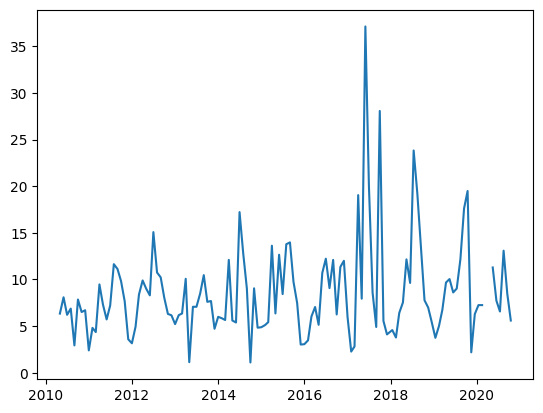

In [122]:
plt.plot(time,NH3_conc)

In [180]:
baiyun.iloc[:129,19]

0           NO2
1      0.442425
2      0.457698
3      0.292406
4      0.487686
         ...   
124    0.305244
125    0.287545
126    0.286547
127    0.338794
128    0.331374
Name: Unnamed: 19, Length: 129, dtype: object

## Dry Deposition

In [230]:
# for dry deposition

NH3_dep = baiyun.iloc[1:129,15]
HNO3_dep = baiyun.iloc[1:129,16]
NH4_dep = baiyun.iloc[1:129,17]
NO3_dep = baiyun.iloc[1:129,18]
NO2_dep = baiyun.iloc[1:129,19]
tot_dry = baiyun.iloc[1:129,20]

NH3_d = [0 if math.isnan(value) else value for value in NH3_dep]
HNO3_d = [0 if math.isnan(value) else value for value in HNO3_dep]
NH4_d = [0 if math.isnan(value) else value for value in NH4_dep]
NO3_d = [0 if math.isnan(value) else value for value in NO3_dep]
NO2_d = [0 if math.isnan(value) else value for value in NO2_dep]
tot_d = [0 if math.isnan(value) else value for value in tot_dry]

In [199]:
slopeno2, interceptno2, r_value, p_value, std_err = linregress(t, NO2_d)
p_value
r_value

-0.13797605949403632

In [200]:
slopehno3, intercepthno3, r_value, p_value, std_err = linregress(t, HNO3_d)
p_value

7.945160792216256e-07

In [201]:
slopenh3, interceptnh3, r_value, p_value, std_err = linregress(t, NH3_d)
p_value

0.04229699721978073

In [220]:
slopenh4, interceptnh4, r_value, p_value, std_err = linregress(t, NH4_d)
p_value
#r_value

0.23751544836767755

In [203]:
slopeno3, interceptno3, r_value, p_value, std_err = linregress(t, NO3_d)
p_value
r_value

-0.27859547361210524

In [204]:


yno2,yno3,ynh3,ynh4,yhno3=[],[],[],[],[]
for i in t:
    yno2.append(slopeno2*i+interceptno2)
    yno3.append(slopeno3*i+interceptno3)
    ynh3.append(slopenh3*i+interceptnh3)
    ynh4.append(slopenh4*i+interceptnh4)
    yhno3.append(slopehno3*i+intercepthno3)

Text(0, 0.5, 'dry deposition')

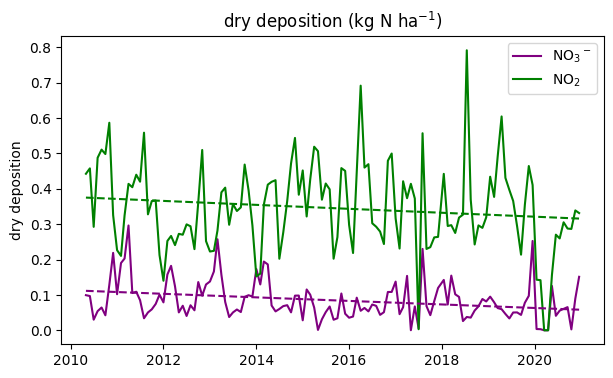

In [225]:
#plt.plot(time,NH4_d)
plt.figure(figsize=(7, 4)) 

plt.plot(time,NO3_d, label='NO$_3$$^-$',color='purple')
plt.plot(time,NO2_d, label = 'NO$_2$',color='green')
plt.plot(time, yno3, color='purple',linestyle='--')
plt.plot(time, yno2, color='green',linestyle='--')
plt.title('dry deposition (kg N ha$^{-1}$)')
plt.legend()
plt.ylabel('dry deposition')

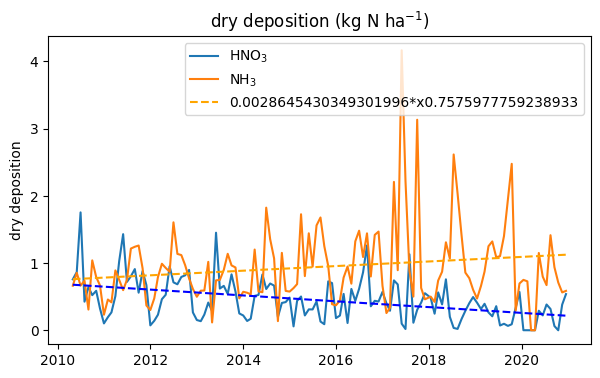

In [226]:
plt.figure(figsize=(7, 4)) 

plt.plot(time,HNO3_d, label='HNO$_3$')
plt.plot(time,NH3_d, label = 'NH$_3$')
plt.plot(time, yhno3, color='blue',linestyle='--')
plt.plot(time, ynh3, color='orange',linestyle='--',label=str(slopenh3)+'*x'+str(interceptnh3))
plt.title('dry deposition (kg N ha$^{-1}$)')
plt.ylabel('dry deposition')
plt.legend()

Text(0, 0.5, 'dry deposition')

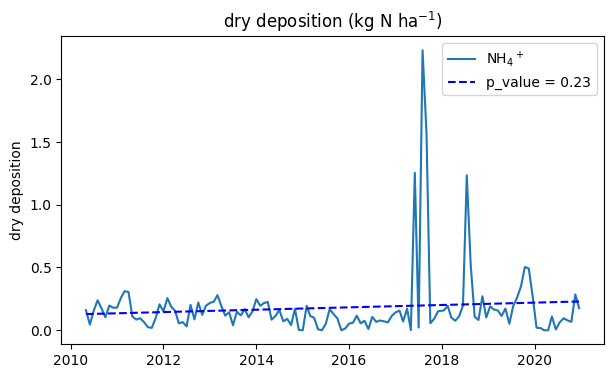

In [227]:
plt.figure(figsize=(7, 4)) 

plt.plot(time,NH4_d, label='NH$_4$$^+$')
plt.plot(time,ynh4, linestyle='--',color='b',label='p_value = 0.23')
plt.title('dry deposition (kg N ha$^{-1}$)')
plt.legend()
plt.ylabel('dry deposition')

## Wet Deposition

In [241]:
baiyun.iloc[:129,27]

0      Total-wet
1       2.705622
2       3.612476
3       0.927072
4       1.478466
         ...    
124       4.1713
125     4.004564
126            0
127     0.768612
128          NaN
Name: Unnamed: 27, Length: 129, dtype: object

In [242]:
NH4_wet = baiyun.iloc[1:129,25]
NO3_wet = baiyun.iloc[1:129,26]
tot_wet = baiyun.iloc[1:129,27]

nh4_w = [0 if math.isnan(value) else value for value in NH4_wet]
no3_w = [0 if math.isnan(value) else value for value in NO3_wet]
tot_w = [0 if math.isnan(value) else value for value in tot_wet]

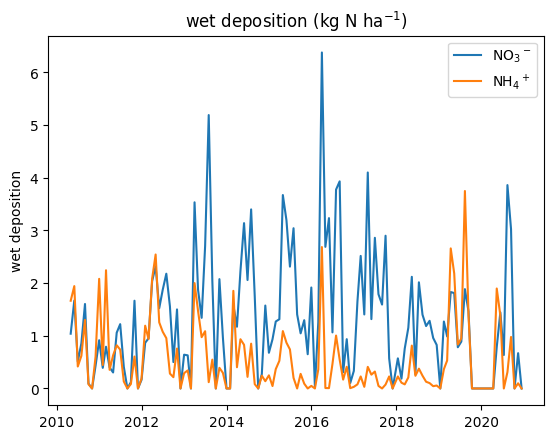

In [244]:
plt.plot(time,no3_w, label='NO$_3$$^-$')
plt.plot(time,nh4_w, label = 'NH$_4$$^+$')
# plt.plot(time, yhno3, color='blue',linestyle='--')
# plt.plot(time, ynh3, color='orange',linestyle='--',label=str(slopenh3)+'*x'+str(interceptnh3))
plt.title('wet deposition (kg N ha$^{-1}$)')
plt.ylabel('wet deposition')
plt.legend()

In [245]:
slope, intercept, r_value, p_value, std_err = linregress(t, no3_w)
p_value


0.8378796916218537

In [248]:
slopeno2, interceptno2, r_value, p_value, std_err = linregress(t, nh4_w)
p_value


0.06222251141866478

## Concentration

In [125]:
# replace nan with 0

NH3_c = [0 if math.isnan(value) else value for value in NH3_conc]
HNO3_c = [0 if math.isnan(value) else value for value in HNO3_conc]
NH4_c = [0 if math.isnan(value) else value for value in NH4_conc]
NO3_c = [0 if math.isnan(value) else value for value in NO3_conc]
NO2_c = [0 if math.isnan(value) else value for value in NO2_conc]


In [128]:
# Convert lists to numpy arrays
t = np.arange(1,129,1)
#NH3_c = np.array(NH3_conc)
#NH3_filt = NH3_c[~np.isnan(NH3_c)]

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(t, NH3_c)
slope2, intercept2,r_value, p_value2, std_err  = linregress(t, HNO3_c)
slope3, intercept3,r_value, p_value3, std_err  = linregress(t, NH4_c)
slope4, intercept4, r_value, p_value4, std_err = linregress(t, NO3_c)
slope5, intercept5, r_value, p_value5, std_err  = linregress(t, NO2_c)

print("Slope:", slope)
print("Intercept:", intercept)
print("Correlation coefficient (r):", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)

Slope: 0.016299988745555657
Intercept: 7.2400844541313365
Correlation coefficient (r): -0.3127814216033633
P-value: 0.19811510032688567
Standard error: 0.0069903011110793375


In [129]:
print('NH3_conc', slope)
print('NH4+_conc', slope3)
print('NO2_conc',slope5)

NH3_conc 0.016299988745555657
NH4+_conc 0.018643111299994755
NO2_conc -0.025839163411506712


In [130]:
concentration = [NH3_c, HNO3_c, NH4_c, NO2_c, NO3_c]
linear = [[],[],[],[],[]]



In [131]:
# for j in linear:
#     for i in concentration: 
#         slope, intercept, r_value, p_value, std_err = linregress(t, i)
#         for r in t:
#             j.append(slope*r+intercept)

In [132]:
def eq(x):
    return slope*x+intercept

y,y2,y3,y4,y5=[],[],[],[],[]
for i in t:
    y.append(eq(i))
    y2.append(slope2*i+intercept2)
    y3.append(slope3*i+intercept3)
    y4.append(slope4*i+intercept4)
    y5.append(slope5*i+intercept5)

In [133]:
slope

0.016299988745555657

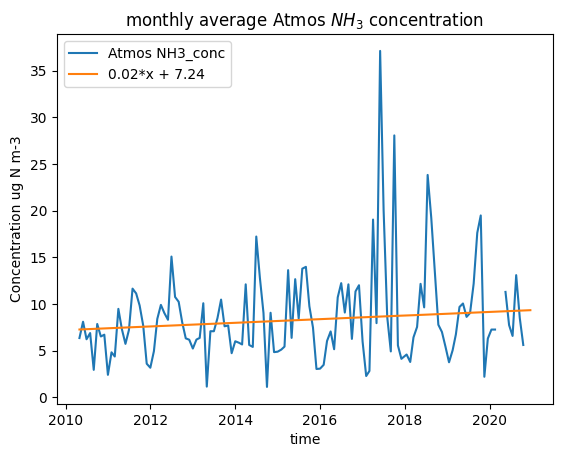

p+value = 0.19811510032688567


In [139]:
plt.plot(time,NH3_conc,label='Atmos NH3_conc')
plt.plot(time, y,  label=f'{slope:.2f}*x + {intercept:.2f}')
plt.xlabel('time')
plt.ylabel('Concentration ug N m-3')
plt.title('monthly average Atmos $NH_3$ concentration')
plt.legend()
plt.show()
print('p_value = '+str(p_value))

In [22]:
time[:-36]

1     2010-05-01
2     2010-06-01
3     2010-07-01
4     2010-08-01
5     2010-09-01
         ...    
106   2019-02-15
107   2019-03-15
108   2019-04-15
109   2019-05-15
110   2019-06-15
Name: Month-Year, Length: 110, dtype: datetime64[ns]

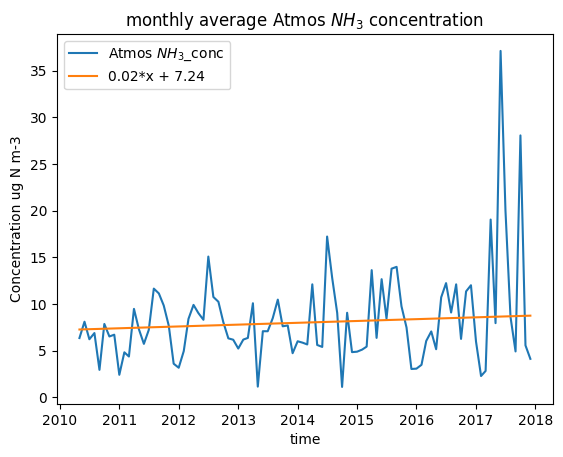

p_value = 0.19811510032688567


In [141]:
# until 2017

plt.plot(time[:-36],NH3_conc[:-36],label='Atmos $NH_3$_conc')
plt.plot(time[:-36], y[:-36],  label=f'{slope:.2f}*x + {intercept:.2f}')
plt.xlabel('time')
plt.ylabel('Concentration ug N m-3')
plt.title('monthly average Atmos $NH_3$ concentration')
plt.legend()
plt.show()
print('p_value = '+str(p_value))

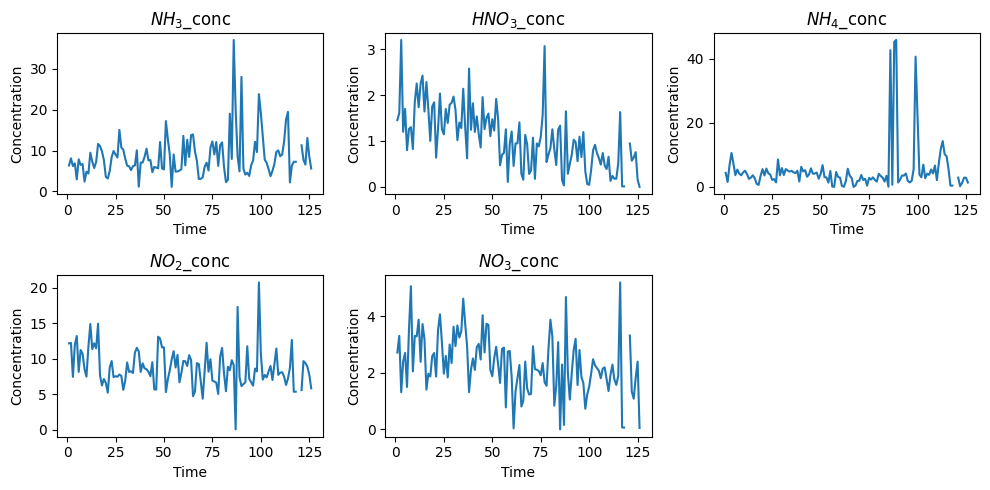

In [142]:

concentration_arrays = [NH3_conc, HNO3_conc, NH4_conc, NO2_conc, NO3_conc]
labels = ['$NH_3$_conc', '$HNO_3$_conc', '$NH_4$_conc', '$NO_2$_conc', '$NO_3$_conc']

# Set the figure size
plt.figure(figsize=(10, 5))

# Loop over the concentration arrays and create subplots
for i, (conc_array, label) in enumerate(zip(concentration_arrays, labels), start=1):
    plt.subplot(2, 3, i)
    plt.plot(conc_array)
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.title(label)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

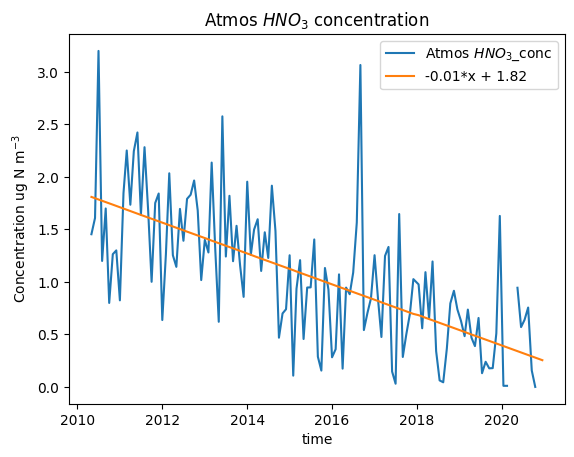

p_value = 4.115848453140703e-18


In [146]:
plt.plot(time,HNO3_conc,label='Atmos $HNO_3$_conc')
plt.plot(time, y2,  label=f'{slope2:.2f}*x + {intercept2:.2f}')
plt.xlabel('time')
plt.ylabel('Concentration ug N m$^{-3}$')
plt.title('Atmos $HNO_3$ concentration')
plt.legend()
plt.show()
print('p_value = '+str(p_value2))

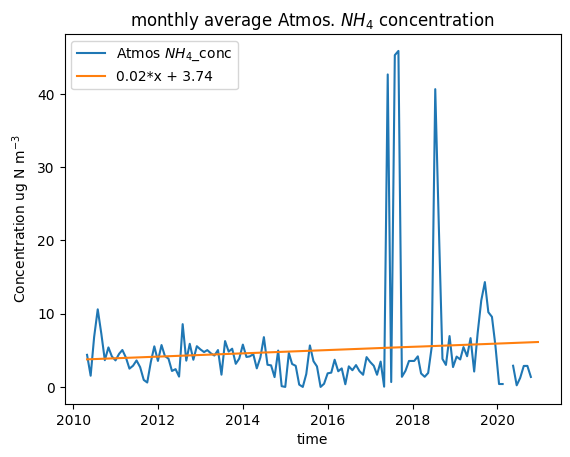

p_value = 0.30529511255937997


In [148]:
plt.plot(time,NH4_conc,label='Atmos $NH_4$_conc')
plt.plot(time, y3,  label=f'{slope3:.2f}*x + {intercept3:.2f}')
plt.xlabel('time')
plt.ylabel('Concentration ug N m$^{-3}$')
plt.title('monthly average Atmos. $NH_4$ concentration')
plt.legend()
plt.show()
print('p_value = '+str(p_value3))

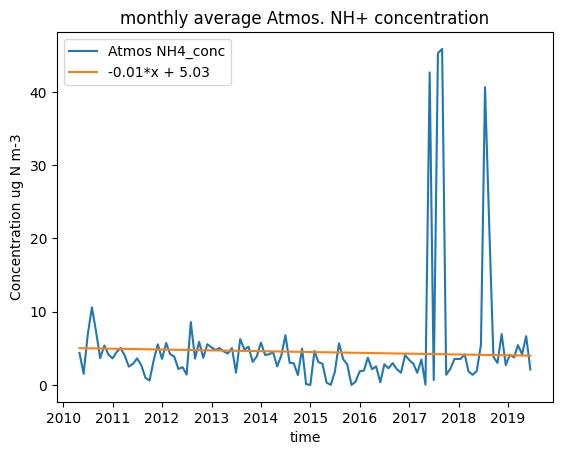

In [27]:
# until 2017

plt.plot(time[:-36],NH4_conc[:-36],label='Atmos $NH_4$_conc')
plt.plot(time[:-36], y3[:-36],  label=f'{slope3:.2f}*x + {intercept3:.2f}')
plt.xlabel('time')
plt.ylabel('Concentration ug N m$^{-3}$')
plt.title('monthly average Atmos. $NH_4$ concentration')
plt.legend()

In [28]:
# omit the abnormal high values in 2017 for NH4+
y0 = []
slope0, intercept0,r_value, p_value, std_err  = linregress(t[:-48], NH4_c[:-48])
for i in t:
    y0.append(slope0*i+intercept0)

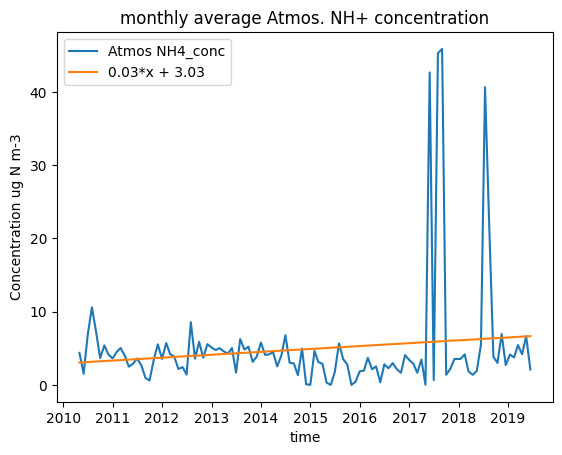

In [29]:
plt.plot(time[:-36],NH4_conc[:-36],label='Atmos NH4_conc')
plt.plot(time[:-36], y0[:-36],  label=f'{slope0:.2f}*x + {intercept0:.2f}')
plt.xlabel('time')
plt.ylabel('Concentration ug N m-3')
plt.title('monthly average Atmos. NH+ concentration')
plt.legend()

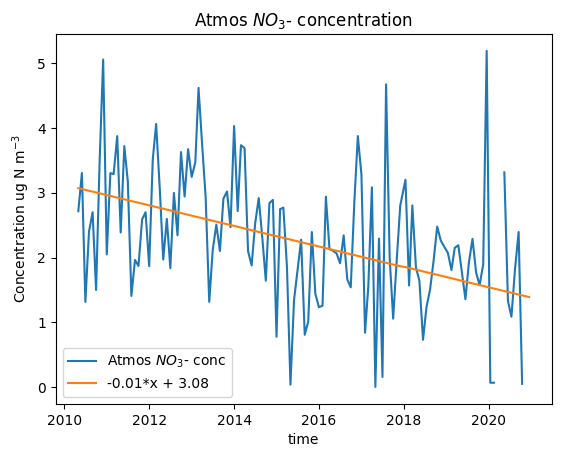

p_value = 9.717705544491422e-08


In [150]:
plt.plot(time,NO3_conc,label='Atmos $NO_3$- conc')
plt.plot(time, y4,  label=f'{slope4:.2f}*x + {intercept4:.2f}')
plt.xlabel('time')
plt.ylabel('Concentration ug N m$^{-3}$')
plt.title('Atmos $NO_3$- concentration')
plt.legend()
plt.show()
print('p_value = '+str(p_value4))

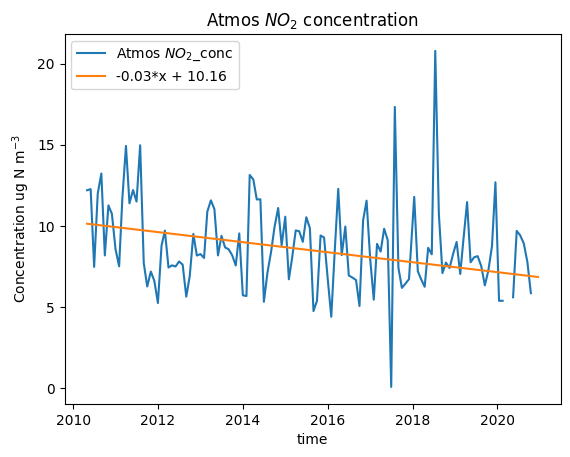

p_value = 0.00032485251611360795


In [151]:
plt.plot(time,NO2_conc,label='Atmos $NO_2$_conc')
plt.plot(time, y5,  label=f'{slope5:.2f}*x + {intercept5:.2f}')
plt.xlabel('time')
plt.ylabel('Concentration ug N m$^{-3}$')
plt.title('Atmos $NO_2$ concentration')
plt.legend()
plt.show()
print('p_value = '+str(p_value5))

In [32]:
time

1     2010-05-01
2     2010-06-01
3     2010-07-01
4     2010-08-01
5     2010-09-01
         ...    
142          NaT
143          NaT
144          NaT
145          NaT
146          NaT
Name: Month-Year, Length: 146, dtype: datetime64[ns]

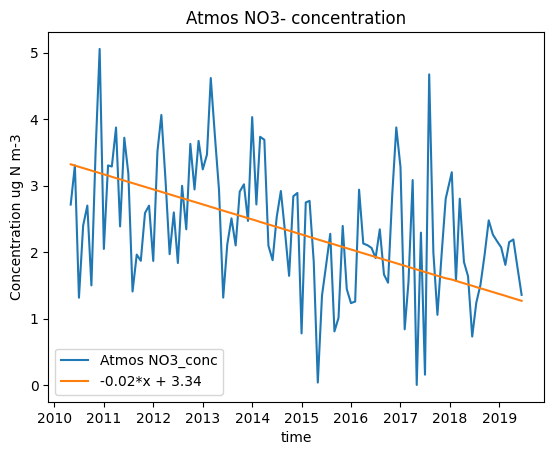

In [33]:
plt.plot(time[:-36],NO3_conc[:-36],label='Atmos NO3_conc')
plt.plot(time[:-36], y4[:-36],  label=f'{slope4:.2f}*x + {intercept4:.2f}')
plt.xlabel('time')
plt.ylabel('Concentration ug N m-3')
plt.title('Atmos NO3- concentration')
plt.legend()


## for dry deposition

In [34]:
# read in data
deposition= pd.read_excel("/Users/hrd/Documents/N Dep/NNDMN/Guangzhou site_NNDMN (Updated to 202012) summarized by MX_WZ_XW_LXJ.xlsx", 
                          sheet_name=1)

In [35]:
deposition.columns

Index(['SE16', 'Month-Year', 'Unnamed: 2', 'Vd / cm s-1', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Atmos. Nr conc. / ug N m-3',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Dry Deposition / kg N ha-1', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Nr conc. in rainwater / mg N L-1', 'Unnamed: 21', 'Unnamed: 22',
       'Wet deposition / kg N ha-1', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Wet+Dry', 'Unnamed: 28'],
      dtype='object')

In [36]:
# delete unnecessary columns, only remain columns for dry deposition

depo = deposition.drop(deposition.columns[2:13],axis=1)
depo = depo.drop(depo.columns[-10:],axis=1)
depo = depo.drop(depo.columns[0],axis=1)

depo.head()

,Month-Year,Dry Deposition / kg N ha-1,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NH3,HNO3,pNH4+,pNO3-,NO2,Total-dry
1,2010-05-01 00:00:00,0.662261,0.757865,0.160004,0.099231,0.442425,2.121787
2,2010-06-01 00:00:00,0.855547,0.865507,0.044793,0.096785,0.457698,2.32033
3,2010-07-01 00:00:00,0.664778,1.753947,0.155486,0.03,0.292406,2.896617
4,2010-08-01 00:00:00,0.737718,0.425814,0.238767,0.054121,0.487686,1.944106


In [37]:
# annual rows:  (index)
#      9, 22,35,48,61,74,87,100,113,126,139
depo.loc[139]

Month-Year                         2020
Dry Deposition / kg N ha-1      7.16209
Unnamed: 14                     1.27705
Unnamed: 15                    0.457792
Unnamed: 16                    0.357092
Unnamed: 17                     1.84955
Unnamed: 18                   11.103574
Name: 139, dtype: object

In [38]:
# delete rows for annual data
annual = [9,22,35,48,61,74,87,100,113,126,139]
monthly = depo.drop(annual)   # dataframe with monthly data only

to_drop = [137,138]          # drop the last two lines of no data
monthly = monthly.drop(to_drop)


In [39]:
a = depo.loc[9]
a.tolist()

[2010,
 5.72809536036991,
 5.88076475196198,
 1.25171244093249,
 0.734120817813734,
 3.60132543456926,
 17.1960188056474]

In [40]:
# list of annual data
# in the order of NH3, HNO3, NH4+, NO3-, NO2, total
annually = []

for i in range(len(annual)):
    annually.append(depo.loc[annual[i]].tolist())#,ignore_index=True)

annually[1]

[2011,
 9.10488743990672,
 8.07736274487862,
 1.76075302003547,
 1.40881991651249,
 4.27034141705854,
 24.6221645383918]

In [41]:
# variable 'time' for each month
time = monthly['Month-Year']
time.tolist()

# list of years for annual data
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

In [42]:
# column names:
# NH3: 'Dry Deposition / kg N ha-1', 
# HNO3: 'Unnamed: 14', 
# pNH4+: 'Unnamed: 15',
# pNO3-: 'Unnamed: 16', 
# NO2: 'Unnamed: 17', 
# total-dry: 'Unnamed: 18' 

# select each species for dry dep
nh3 = monthly['Dry Deposition / kg N ha-1']
hno3 = monthly['Unnamed: 14']
nh4 = monthly['Unnamed: 15']
no3 = monthly['Unnamed: 16']
no2 = monthly['Unnamed: 17']
total = monthly['Unnamed: 18']

In [43]:
nh4[1:]

1      0.160004
2      0.044793
3      0.155486
4      0.238767
5      0.172848
         ...   
141         NaN
142         NaN
143         NaN
144         NaN
145         NaN
Name: Unnamed: 15, Length: 132, dtype: object

In [50]:
print(len(time))
print(len(nh3))

133
133


TypeError: 'value' must be an instance of str or bytes, not a float

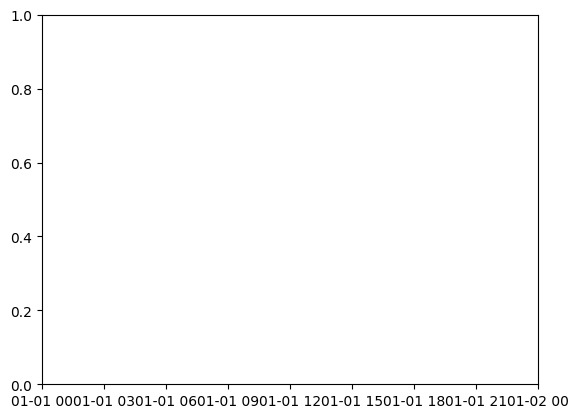

In [51]:
plt.plot(time[:],nh3[:])
plt.ylabel('Dry Deposition / kg N ha-1')
plt.title('monthly deposition of NH3')

In [52]:
annually[0]

[2010,
 5.72809536036991,
 5.88076475196198,
 1.25171244093249,
 0.734120817813734,
 3.60132543456926,
 17.1960188056474]

In [53]:
# deposition peaks in 2017


annually[10][1] - annually[0][1]

1.4339949003949704

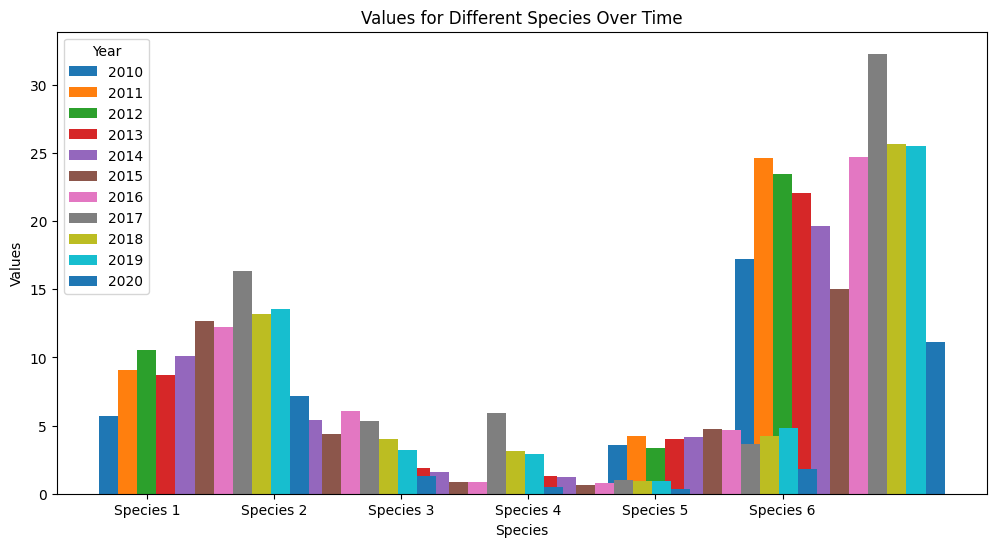

In [54]:

# Extract years and values
years = [data[0] for data in annually]
values = [data[1:] for data in annually]

# Plotting the bar chart
plt.figure(figsize=(12, 6))

for i, year_values in enumerate(values):
    plt.bar(np.arange(len(year_values)) + i * 0.15, year_values, width=0.15, label=str(years[i]))

plt.xlabel('Species')
plt.ylabel('Values')
plt.title('Values for Different Species Over Time')
plt.xticks(np.arange(6) + 0.3, ['Species 1', 'Species 2', 'Species 3', 'Species 4', 'Species 5', 'Species 6'])
plt.legend(title='Year')
plt.show()

/var/folders/2n/_rb3symj5cj8_z4p1hf_hkjm0000gn/T/ipykernel_62355/4043881962.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_species)  # Use a colormap for different species


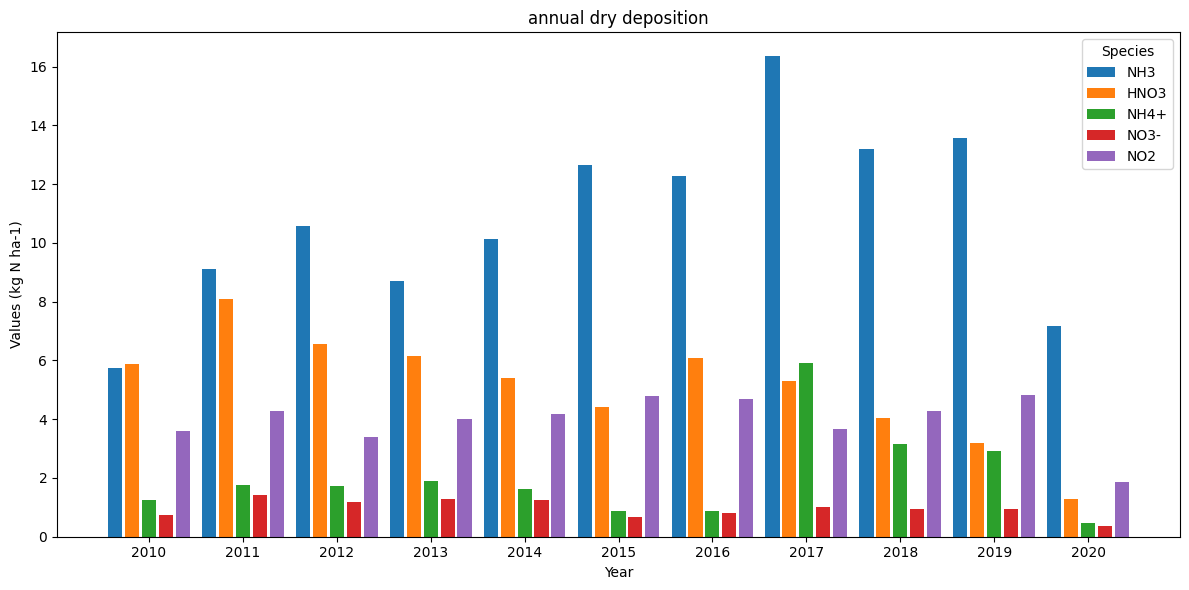

In [55]:
species_names = ['NH3', 'HNO3', 'NH4+', 'NO3-', 'NO2']

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))

num_species = len(values[0])
colors = plt.cm.get_cmap('tab10', num_species)  # Use a colormap for different species

num_species = len(values[0])-1
bar_width = 0.15
spacing = 0.03

for i in range(num_species):
    offsets = np.arange(len(years)) + i * (bar_width + spacing)
    plt.bar(offsets, [data[i] for data in values], width=bar_width, label=species_names[i])

plt.xlabel('Year')
plt.ylabel('Values (kg N ha-1)')
plt.title('annual dry deposition')
plt.xticks(np.arange(len(years)) + (num_species - 1) * 0.5 * (bar_width + spacing), years)  # Set the actual years as x-axis ticks
plt.legend(title='Species')
plt.tight_layout()
plt.show()

annual sum
### significant drop in 2020 because of missing data

In [56]:
annually[0]

[2010,
 5.72809536036991,
 5.88076475196198,
 1.25171244093249,
 0.734120817813734,
 3.60132543456926,
 17.1960188056474]

In [57]:
annually[0][-1] - annually[-1][-1]

6.092444343222102

In [58]:
annually[0][-1] - annually[-2][-1]

-8.277372958780997

In [59]:
annually[-1][-1] / annually[0][-1]

0.6457061130206916

In [60]:
tot_dry = []

for i in range(len(annually)):
    tot_dry.append(annually[i][-1])

print(tot_dry)

[17.1960188056474, 24.6221645383918, 23.4475391661327, 22.0797242909871, 19.6279847953255, 15.0061737916747, 24.6782361019322, 32.2780702977695, 25.6260981098177, 25.4733917644284, 11.1035744624253]


In [61]:
T = [1,2,3,4,5,6,7,8,9,10,11]
slope, intercept, r_value, p_value, std_err = linregress(T, tot_dry)

In [62]:
slope

0.04477552126602172

In [63]:
y= []
for i in T:
    y.append(slope*i+intercept)


Text(0.5, 1.0, 'tot_dry, slope = 0.045')

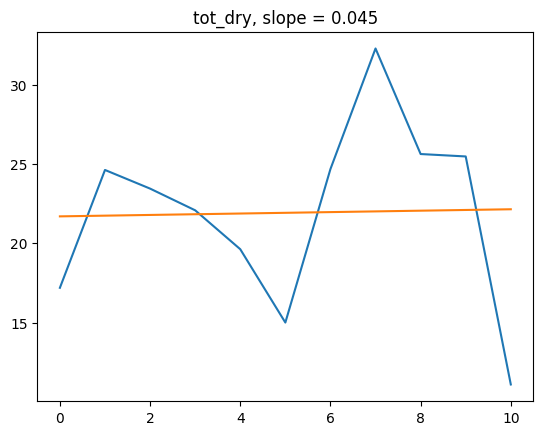

In [64]:
plt.plot(tot_dry)
plt.plot(y)
plt.title('tot_dry, slope = 0.045')

In [65]:
annually[4]

[2014,
 10.1327367601622,
 5.39588854576714,
 1.62326759831203,
 1.25286926595713,
 4.16650612663762,
 19.6279847953255]

In [66]:
7.16+1.27+0.45+-.35+1.849

10.379

## Wet Deposition

In [67]:
deposition.columns

Index(['SE16', 'Month-Year', 'Unnamed: 2', 'Vd / cm s-1', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Atmos. Nr conc. / ug N m-3',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Dry Deposition / kg N ha-1', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Nr conc. in rainwater / mg N L-1', 'Unnamed: 21', 'Unnamed: 22',
       'Wet deposition / kg N ha-1', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Wet+Dry', 'Unnamed: 28'],
      dtype='object')

In [68]:
wet = deposition.drop(deposition.columns[2:23],axis=1)
#wet = depo.drop(depo.columns[:],axis=1)
# depo = depo.drop(depo.columns[0],axis=1)

wet.head()

,SE16,Month-Year,Wet deposition / kg N ha-1,Unnamed: 24,Unnamed: 25,Unnamed: 26,Wet+Dry,Unnamed: 28
0,NaN,NaN,NH4+-N,NO3--N,Total-wet,NaN,NaN,NaN
1,广东省广州市白云区,2010-05-01 00:00:00,1.665632,1.03999,2.705622,NaN,4.827409,NaN
2,NaN,2010-06-01 00:00:00,1.943454,1.669022,3.612476,NaN,5.932806,NaN
3,NaN,2010-07-01 00:00:00,0.416926,0.510146,0.927072,NaN,3.823689,NaN
4,GZ,2010-08-01 00:00:00,0.620401,0.858065,1.478466,NaN,3.422572,NaN


In [69]:
annually = []

for i in range(len(annual)):
    annually.append(wet.loc[annual[i]].tolist())#,ignore_index=True)

annually[1]

[nan, 2011, 8.137335, 7.28103, 15.418365, nan, 40.0405295383919, nan]

In [70]:
annually[0][4]-annually[-1][4]

-2.257627000000001

In [71]:
tot_wet = []
for i in range(len(annually)):
    tot_wet.append(annually[i][4])

In [72]:
tot_wet

[12.840409,
 15.418365,
 26.974279,
 28.53303,
 22.738709,
 25.2817843333333,
 31.33864,
 22.753265,
 15.3592266,
 23.590448,
 15.098036]

In [189]:
T = [1,2,3,4,5,6,7,8,9,10,11]
slope, intercept, r_value, p_value, std_err = linregress(T, tot_wet)
p_value

0.9304844714199855

In [152]:
print(p_value)
print(r_value)

0.19811510032688567
-0.3127814216033633


In [74]:
y= []
for i in T:
    y.append(slope*i+intercept)

Text(0.5, 1.0, 'annual tot wet deposition, slope = 0.056')

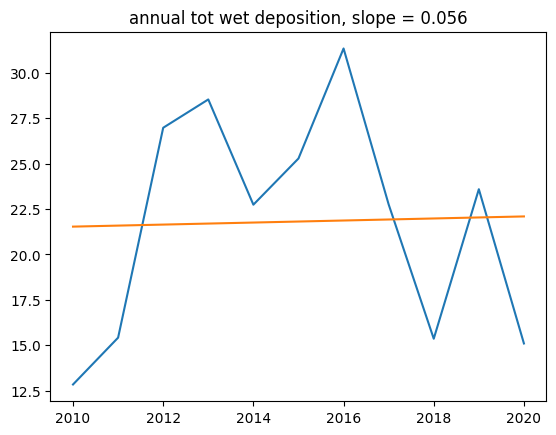

In [75]:
plt.plot(year,tot_wet)
plt.plot(year,y)
plt.title('annual tot wet deposition, slope = 0.056')

In [76]:
year

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]